In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [4]:
import os, glob
import pandas as pd

path = r'C:\Users\jimmy\OneDrive\Desktop\Thesis\Main'

all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
df_merged = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( "merged.csv")

In [5]:
df = pd.read_csv("merged.csv")
df

,Unnamed: 0,Time (Seconds),Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,...,Data14,Data15,Data16,Data17,Data18,Data19,Data20,Data21,Data22,Position
0,0,10.740001,-0.000751,-0.245559,-0.509997,33.379025,6.717778,-6.789277,-0.015395,0.027225,...,8.689763,24.955736,-20.180273,74.658791,-40.839012,-38.936806,22.115620,15.008644,8.477235,Back
1,1,10.755000,0.000902,-0.262880,-0.187202,33.556679,6.694692,-6.789277,-0.017909,0.026037,...,8.686853,22.010353,-20.246210,71.467224,-40.832512,-39.559444,22.084925,15.050882,8.323337,Back
2,2,10.770000,0.000000,-0.265298,-0.130416,33.683418,6.727354,-6.789290,-0.017499,0.028687,...,8.677537,18.903053,-20.262932,67.876343,-40.838371,-39.479042,22.079229,15.045978,8.309034,Back
3,3,10.785001,0.000861,-0.282524,-0.054560,33.700302,6.744976,-6.789290,-0.013278,0.031392,...,8.661868,15.692183,-20.273327,64.046150,-40.841774,-39.421230,22.071976,15.005775,8.329948,Back
4,4,10.800000,0.000287,-0.279546,-0.034069,33.737473,6.795506,-6.789304,-0.008114,0.036214,...,8.648577,12.415071,-20.272617,60.054932,-40.858204,-39.026268,22.069967,15.042167,8.325987,Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,25.064999,-0.000109,-0.264410,0.000041,-0.007609,-0.066799,0.000232,-0.004412,0.002199,...,0.007732,0.000833,0.012226,0.044260,-0.022021,0.020573,-0.000861,0.090077,-0.118476,Right
3996,3996,25.080000,-0.000096,-0.265257,0.000041,-0.005410,-0.065720,0.000232,-0.004180,0.002404,...,0.007691,0.000833,0.012458,0.045967,-0.021297,0.023523,-0.000861,0.090445,-0.116742,Right
3997,3997,25.094999,-0.000082,-0.267238,0.000027,-0.010409,-0.068753,0.000232,-0.004153,0.002514,...,0.007718,0.000833,0.011844,0.044970,-0.020422,0.026228,-0.000861,0.095390,-0.128244,Right
3998,3998,25.109999,-0.000068,-0.268782,0.000041,-0.011283,-0.074545,0.000232,-0.004371,0.002350,...,0.008114,0.000833,0.011488,0.047442,-0.019261,0.021652,-0.000861,0.099106,-0.117520,Right


In [6]:
Data = {}

for i in range(1,23):
    Data['Data'+str(i)] = df['Data'+str(i)]

Data

{'Data1': 0      -0.000751
 1       0.000902
 2       0.000000
 3       0.000861
 4       0.000287
           ...   
 3995   -0.000109
 3996   -0.000096
 3997   -0.000082
 3998   -0.000068
 3999   -0.000082
 Name: Data1, Length: 4000, dtype: float64,
 'Data2': 0      -0.245559
 1      -0.262880
 2      -0.265298
 3      -0.282524
 4      -0.279546
           ...   
 3995   -0.264410
 3996   -0.265257
 3997   -0.267238
 3998   -0.268782
 3999   -0.268823
 Name: Data2, Length: 4000, dtype: float64,
 'Data3': 0      -0.509997
 1      -0.187202
 2      -0.130416
 3      -0.054560
 4      -0.034069
           ...   
 3995    0.000041
 3996    0.000041
 3997    0.000027
 3998    0.000041
 3999    0.000014
 Name: Data3, Length: 4000, dtype: float64,
 'Data4': 0       33.379025
 1       33.556679
 2       33.683418
 3       33.700302
 4       33.737473
           ...    
 3995    -0.007609
 3996    -0.005410
 3997    -0.010409
 3998    -0.011283
 3999    -0.012663
 Name: Data4, Length: 4000, d

In [7]:
Position = df['Position']

Y1 = Position.replace("Forward", 1).replace("Right", 0).replace("Left", 0).replace("Back", 0)

Y2 = Position.replace("Forward", 0).replace("Right", 1).replace("Left", 0).replace("Back", 0)

Y3 = Position.replace("Forward", 0).replace("Right", 0).replace("Left", 1).replace("Back", 0)

Y4 = Position.replace("Forward", 0).replace("Right", 0).replace("Left", 0).replace("Back", 1)

In [8]:
len(Position)

4000

In [9]:
Y_data = [[]]

for i in range(0, len(Position)) :
    Y_data.append([Y1[i],Y2[i],Y3[i],Y4[i]])

Y_data.pop(0)
Y_scaled = np.array(Y_data)

In [10]:
Y_scaled

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=int64)

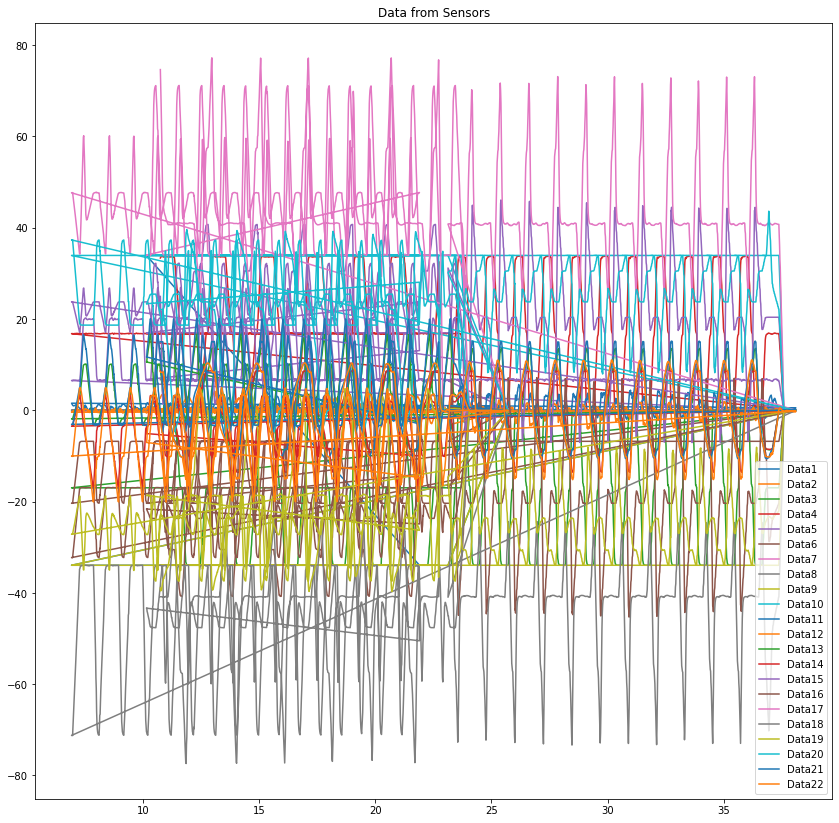

In [11]:
Time = df['Time (Seconds)']

f = plt.figure()
f.set_figwidth(14.28)
f.set_figheight(14.28)

temp_list = []

for i in range(1,23):
    plt.plot(Time,Data['Data'+str(i)],label ='Data'+str(i))

plt.title('Data from Sensors')
    
plt.legend()
plt.show()

In [12]:
sx = preprocessing.MinMaxScaler()

X_scaled = sx.fit_transform(df[['Data1','Data2','Data3','Data4','Data5','Data6',
                                'Data7','Data8','Data9','Data10','Data11','Data12',
                                'Data13','Data14','Data15','Data16','Data17','Data18',
                                'Data19','Data20','Data21','Data22']].values.reshape(df.shape[0],22))


In [13]:
X_scaled

array([[0.49998753, 0.60086657, 0.98495688, ..., 0.55500908, 0.83366604,
        0.91731839],
       [0.50001188, 0.56655064, 0.99446546, ..., 0.55437427, 0.83503987,
        0.91237342],
       [0.49999859, 0.56176016, 0.99613821, ..., 0.55425646, 0.83488036,
        0.91191385],
       ...,
       [0.49999739, 0.55791668, 0.99998068, ..., 0.0976092 , 0.34859841,
        0.64081207],
       [0.49999759, 0.55485774, 0.99998109, ..., 0.0976092 , 0.34871927,
        0.64115665],
       [0.49999739, 0.55477651, 0.99998029, ..., 0.0976092 , 0.34883035,
        0.64168862]])

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y_scaled,test_size=0.2)

In [15]:
X_train.shape

(3200, 22)

In [16]:
np.array(Y_train)

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0]], dtype=int64)

In [17]:
Y_train.shape

(3200, 4)

In [18]:
model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(22,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
100/100 [==============================] - 0s 741us/step - loss: 7.8099 - accuracy: 0.2731
Epoch 2/500
100/100 [==============================] - 0s 741us/step - loss: 6.9183 - accuracy: 0.2472
Epoch 3/500
100/100 [==============================] - 0s 808us/step - loss: 6.0277 - accuracy: 0.2509
Epoch 4/500
100/100 [==============================] - 0s 746us/step - loss: 5.1380 - accuracy: 0.3013
Epoch 5/500
100/100 [==============================] - 0s 759us/step - loss: 4.2514 - accuracy: 0.2800
Epoch 6/500
100/100 [==============================] - 0s 768us/step - loss: 3.3754 - accuracy: 0.2844
Epoch 7/500
100/100 [==============================] - 0s 841us/step - loss: 2.5309 - accuracy: 0.2891
Epoch 8/500
100/100 [==============================] - 0s 687us/step - loss: 1.7711 - accuracy: 0.2847
Epoch 9/500
100/100 [==============================] - 0s 767us/step - loss: 1.1861 - accuracy: 0.4809
Epoch 10/500
100/100 [==============================] - 0s 782us/step - l

100/100 [==============================] - 0s 1ms/step - loss: 0.2436 - accuracy: 0.9513
Epoch 80/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2409 - accuracy: 0.9509
Epoch 81/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2383 - accuracy: 0.9509
Epoch 82/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2357 - accuracy: 0.9509
Epoch 83/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2332 - accuracy: 0.9509
Epoch 84/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2308 - accuracy: 0.9509
Epoch 85/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2283 - accuracy: 0.9503
Epoch 86/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2260 - accuracy: 0.9509
Epoch 87/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2236 - accuracy: 0.9503
Epoch 88/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2214 - accuracy: 

100/100 [==============================] - 0s 1ms/step - loss: 0.1318 - accuracy: 0.9544
Epoch 159/500
100/100 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.9541
Epoch 160/500
100/100 [==============================] - 0s 1ms/step - loss: 0.1304 - accuracy: 0.9541
Epoch 161/500
100/100 [==============================] - 0s 1ms/step - loss: 0.1297 - accuracy: 0.9544
Epoch 162/500
100/100 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.9544
Epoch 163/500
100/100 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.9544
Epoch 164/500
100/100 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.9538
Epoch 165/500
100/100 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.9547
Epoch 166/500
100/100 [==============================] - 0s 706us/step - loss: 0.1266 - accuracy: 0.9525
Epoch 167/500
100/100 [==============================] - 0s 767us/step - loss: 0.1260

100/100 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 0.9563
Epoch 238/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9566
Epoch 239/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0967 - accuracy: 0.9563
Epoch 240/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy: 0.9563
Epoch 241/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0962 - accuracy: 0.9563
Epoch 242/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9566
Epoch 243/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.9566
Epoch 244/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9566
Epoch 245/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9563
Epoch 246/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0949 - a

100/100 [==============================] - 0s 706us/step - loss: 0.0814 - accuracy: 0.9578
Epoch 316/500
100/100 [==============================] - 0s 697us/step - loss: 0.0813 - accuracy: 0.9569
Epoch 317/500
100/100 [==============================] - 0s 655us/step - loss: 0.0811 - accuracy: 0.9578
Epoch 318/500
100/100 [==============================] - 0s 691us/step - loss: 0.0810 - accuracy: 0.9588
Epoch 319/500
100/100 [==============================] - 0s 744us/step - loss: 0.0808 - accuracy: 0.9584
Epoch 320/500
100/100 [==============================] - 0s 699us/step - loss: 0.0807 - accuracy: 0.9581
Epoch 321/500
100/100 [==============================] - 0s 669us/step - loss: 0.0805 - accuracy: 0.9591
Epoch 322/500
100/100 [==============================] - 0s 742us/step - loss: 0.0804 - accuracy: 0.9584
Epoch 323/500
100/100 [==============================] - 0s 735us/step - loss: 0.0802 - accuracy: 0.9578
Epoch 324/500
100/100 [==============================] - 0s 712us/ste

Epoch 394/500
100/100 [==============================] - 0s 731us/step - loss: 0.0718 - accuracy: 0.9616
Epoch 395/500
100/100 [==============================] - 0s 718us/step - loss: 0.0717 - accuracy: 0.9603
Epoch 396/500
100/100 [==============================] - 0s 708us/step - loss: 0.0716 - accuracy: 0.9622
Epoch 397/500
100/100 [==============================] - 0s 677us/step - loss: 0.0715 - accuracy: 0.9625
Epoch 398/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0714 - accuracy: 0.9622
Epoch 399/500
100/100 [==============================] - 0s 758us/step - loss: 0.0713 - accuracy: 0.9625
Epoch 400/500
100/100 [==============================] - 0s 744us/step - loss: 0.0712 - accuracy: 0.9616
Epoch 401/500
100/100 [==============================] - 0s 688us/step - loss: 0.0711 - accuracy: 0.9606
Epoch 402/500
100/100 [==============================] - 0s 689us/step - loss: 0.0711 - accuracy: 0.9619
Epoch 403/500
100/100 [==============================] - 

100/100 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9709
Epoch 473/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.9694
Epoch 474/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9688
Epoch 475/500
100/100 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9653
Epoch 476/500
100/100 [==============================] - 0s 1ms/step - loss: 0.0651 - accuracy: 0.9703
Epoch 477/500
100/100 [==============================] - 0s 952us/step - loss: 0.0650 - accuracy: 0.9663
Epoch 478/500
100/100 [==============================] - 0s 746us/step - loss: 0.0650 - accuracy: 0.9678
Epoch 479/500
100/100 [==============================] - 0s 718us/step - loss: 0.0649 - accuracy: 0.9697
Epoch 480/500
100/100 [==============================] - 0s 732us/step - loss: 0.0648 - accuracy: 0.9719
Epoch 481/500
100/100 [==============================] - 0s 713us/step - loss: 

In [19]:
model.evaluate(X_test,Y_test)

25/25 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9762


[0.05900486931204796, 0.9762499928474426]

In [20]:
y_prid = model.predict(X_test)
y_prid

array([[1.2240696e-01, 2.2033024e-01, 1.5060246e-11, 7.3442316e-01],
       [2.4261014e-06, 1.3546944e-03, 9.9999964e-01, 1.0892451e-03],
       [3.6138266e-02, 9.9324763e-01, 1.2699695e-11, 1.3189554e-02],
       ...,
       [6.2429011e-02, 2.2398889e-02, 8.4728053e-06, 8.2191259e-01],
       [8.6422074e-01, 2.1161854e-02, 9.5569603e-06, 5.4436594e-02],
       [9.4688839e-01, 3.1834006e-02, 1.1164889e-05, 6.5304041e-03]],
      dtype=float32)

In [21]:
Y_test

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=int64)

In [22]:
coef, intercept = model.get_weights()

In [23]:
coef, intercept

(array([[ 1.27748156e+00,  1.41748486e+01, -3.48457146e+01,
          1.17854916e-01],
        [-1.24937691e-01, -1.10671115e+00,  1.38625145e+00,
         -4.39484388e-01],
        [-5.71032584e-01,  3.90458912e-01,  1.17495172e-01,
         -1.97077215e+00],
        [-1.34342954e-01, -1.60156894e+00,  4.78853434e-01,
          1.74762440e+00],
        [-1.28935461e+01,  5.11540842e+00,  1.00185556e+01,
         -6.59726381e+00],
        [ 8.12557220e+00, -4.02041388e+00, -8.03934860e+00,
          3.93124056e+00],
        [ 5.27902460e+00, -4.47803450e+00, -4.72751236e+00,
          3.51381922e+00],
        [-4.54884195e+00,  3.22860694e+00,  6.81696129e+00,
         -4.52434254e+00],
        [-2.67802429e+00,  2.50457692e+00, -6.08337259e+00,
         -3.83847332e+00],
        [-4.53712910e-01, -2.65070224e+00,  1.88747954e+00,
          1.85791862e+00],
        [ 9.36635971e+00,  1.75324762e+00,  2.06626987e+00,
         -1.26848307e+01],
        [-9.38518238e+00, -3.63121152e+00, 

In [24]:
motion = ['Forward','Right','Left','Back']
correct_motion = [np.argmax(element) for element in Y_test]
prid_motion = [np.argmax(element) for element in y_prid]


In [25]:
for i in range(len(Y_test)):
    print('correct motion is -',motion[correct_motion[i]],'\t prid motion is -',motion[prid_motion[i]])

correct motion is - Back 	 prid motion is - Back
correct motion is - Left 	 prid motion is - Left
correct motion is - Right 	 prid motion is - Right
correct motion is - Right 	 prid motion is - Right
correct motion is - Right 	 prid motion is - Right
correct motion is - Left 	 prid motion is - Left
correct motion is - Left 	 prid motion is - Left
correct motion is - Right 	 prid motion is - Back
correct motion is - Right 	 prid motion is - Right
correct motion is - Left 	 prid motion is - Left
correct motion is - Right 	 prid motion is - Right
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Right 	 prid motion is - Right
correct motion is - Right 	 prid motion is - Right
correct motion is - Left 	 prid motion is - Left
correct motion is - Left 	 prid motion is - Left
correct motion is - Right 	 prid motion is - Right
correct motion is - Right 	 prid motion is - Right
correct motion is - Left 	 prid motion

correct motion is - Forward 	 prid motion is - Forward
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Left 	 prid motion is - Left
correct motion is - Left 	 prid motion is - Left
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Right 	 prid motion is - Right
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Right 	 prid motion is - Right
correct motion is - Back 	 prid motion is - Back
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Right 	 prid motion is - Right
correct motion is - Back 	 prid motion is - Back
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Back 	 prid motion is - Back
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Right 	 prid motion is - Right
correct motion is - Right 	 prid motion is - Right
correct motion is - Back 	 prid motion is - Back
correct mot

correct motion is - Forward 	 prid motion is - Forward
correct motion is - Right 	 prid motion is - Right
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Left 	 prid motion is - Left
correct motion is - Back 	 prid motion is - Back
correct motion is - Right 	 prid motion is - Right
correct motion is - Back 	 prid motion is - Back
correct motion is - Right 	 prid motion is - Right
correct motion is - Left 	 prid motion is - Left
correct motion is - Right 	 prid motion is - Right
correct motion is - Right 	 prid motion is - Right
correct motion is - Back 	 prid motion is - Back
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Right 	 prid motion is - Right
correct motion is - Right 	 prid motion is - Right
correct motion is - Right 	 prid motion is - Right
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Forward 	 prid motion is - Forward
correct motion is

correct motion is - Back 	 prid motion is - Back
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Left 	 prid motion is - Left
correct motion is - Left 	 prid motion is - Left
correct motion is - Right 	 prid motion is - Right
correct motion is - Back 	 prid motion is - Back
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Back 	 prid motion is - Back
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Right 	 prid motion is - Right
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Forward 	 prid motion is - Forward
correct motion is - Back 	 prid motion is - Forward
correct motion is - Left 	 prid motion is - Left
correct motion is - Back 	 prid motion is - Back
correct motion is - Right 	 prid motion is - Right
correct motion is - Left 	 prid motion is - Left
correct motion is - Right 	 prid motion is - Right
correct motion is - Left 	 prid motion is - Left
correct motion is - Forward 

In [26]:
import random

fd = []
rd = []
ld = []

for i in range(len(y_prid)):
    fd.append(random.uniform(0,5))
    rd.append(random.uniform(0,5))
    ld.append(random.uniform(0,5))

forward_dist = np.array(fd)
right_dist = np.array(rd)
left_dist = np.array(ld)

forward_dist.shape

(800,)

In [27]:
def Next_motion(prid_motion,forward_dist,right_dist,left_dist):
    
    next_motion = []
    
    for i in range(len(prid_motion)):
        if prid_motion[i] == 'Forward':
            if forward_dist[i] < 1.5:
                next_motion.append('Forward')
            elif right_dist[i] < 2.5 or left_dist[i] < 2.5:
                next_motion.append('Right')
            elif left_dist[i] < 2.5:
                next_motion.append('Left')
            elif forward_dist[i] < 3.5:
                next_motion.append('Forward')
            else:
                next_motion.append('Back')
        elif prid_motion[i] == 'Right':
            if right_dist[i] < 2.5:
                next_motion.append('Right')
            elif forward_dist[i] < 1.5:
                next_motion.append('Forward')
            elif left_dist[i] < 2.5:
                next_motion.append('Left')
            elif forward_dist[i] < 3.5:
                next_motion.append('Forward')
            else:
                next_motion.append('Back')
        elif prid_motion[i] == 'Left':
            if left_dist[i] < 2.5:
                next_motion.append('left')
            elif forward_dist[i] < 1.5:
                next_motion.append('Forward')
            elif right_dist[i] < 2.5:
                next_motion.append('right')
            elif forward_dist[i] < 3.5:
                next_motion.append('Forward')
            else:
                next_motion.append('Back')
        else:
            if forward_dist[i] < 1.5:
                next_motion.append('Forward')
            elif right_dist[i] < 2.5 or left_dist[i] < 2.5:
                next_motion.append('Right')
            elif left_dist[i] < 2.5:
                next_motion.append('Left')
            elif forward_dist[i] < 3.5:
                next_motion.append('Forward')
            else:
                next_motion.append('Back')
    
    return next_motion

In [28]:
current_motion = []

for i in range(len(y_prid)):
    current_motion.append(motion[prid_motion[i]])

current_motion = np.array(current_motion)

In [29]:
next_motion = Next_motion(current_motion,forward_dist,right_dist,left_dist)

In [30]:
for i in range(len(y_prid)):
    print('forward distance = ',forward_dist[i],'\t right distance = ',right_dist[i],'\t left distance = ',left_dist[i])
    print('current motion -',current_motion[i],'\t\t next motion -',next_motion[i])

forward distance =  1.119289449596782 	 right distance =  3.2331770058226077 	 left distance =  1.8248880272657346
current motion - Back 		 next motion - Forward
forward distance =  0.34417397710068964 	 right distance =  0.8985026315548672 	 left distance =  1.2858144280991097
current motion - Left 		 next motion - left
forward distance =  1.8853613071208852 	 right distance =  4.455583097900988 	 left distance =  3.368122887602052
current motion - Right 		 next motion - Forward
forward distance =  4.88897568925661 	 right distance =  4.825754006353091 	 left distance =  2.7696413851322195
current motion - Right 		 next motion - Back
forward distance =  4.603055639091829 	 right distance =  3.858151603508581 	 left distance =  3.430660287707981
current motion - Right 		 next motion - Back
forward distance =  0.9436215916397994 	 right distance =  4.845023094845389 	 left distance =  1.3304159251292935
current motion - Left 		 next motion - left
forward distance =  2.1613620705172956 	

current motion - Left 		 next motion - left
forward distance =  1.818287675166873 	 right distance =  2.211211577690839 	 left distance =  4.057697419348336
current motion - Left 		 next motion - right
forward distance =  2.7430956084711293 	 right distance =  0.1736563526819418 	 left distance =  0.7012998634397
current motion - Left 		 next motion - left
forward distance =  0.8338524719284723 	 right distance =  4.829896583856699 	 left distance =  2.77223517134114
current motion - Back 		 next motion - Forward
forward distance =  2.173374136656295 	 right distance =  0.08644520902058861 	 left distance =  3.5552332150514445
current motion - Back 		 next motion - Right
forward distance =  1.9961789633464533 	 right distance =  3.0218186395754705 	 left distance =  3.5573896656126136
current motion - Left 		 next motion - Forward
forward distance =  0.6774400378977813 	 right distance =  1.555012314462969 	 left distance =  1.7138011431982298
current motion - Back 		 next motion - For

current motion - Right 		 next motion - Left
forward distance =  1.7767449077715936 	 right distance =  3.002668758783516 	 left distance =  2.633561540048899
current motion - Back 		 next motion - Forward
forward distance =  0.28468542042150213 	 right distance =  3.3196257991308564 	 left distance =  3.9268538102378443
current motion - Back 		 next motion - Forward
forward distance =  1.3864513723261973 	 right distance =  2.7206294201973806 	 left distance =  0.5250352141242448
current motion - Right 		 next motion - Forward
forward distance =  4.39773549239376 	 right distance =  3.65672931034176 	 left distance =  2.303116057992881
current motion - Left 		 next motion - left
forward distance =  3.8033448631816764 	 right distance =  3.051617360730524 	 left distance =  4.6980797775118655
current motion - Left 		 next motion - Back
forward distance =  4.856075039594355 	 right distance =  1.3881543192768047 	 left distance =  4.8493297159656965
current motion - Left 		 next motion 

current motion - Forward 		 next motion - Right
forward distance =  1.3497818349817354 	 right distance =  0.7045204067698752 	 left distance =  1.1020057895768303
current motion - Left 		 next motion - left
forward distance =  0.3451379247861358 	 right distance =  0.8823882635885821 	 left distance =  4.443051789686629
current motion - Forward 		 next motion - Forward
forward distance =  3.672601772774992 	 right distance =  2.3429345942116435 	 left distance =  3.9700142474286415
current motion - Back 		 next motion - Right
forward distance =  0.2987606570976742 	 right distance =  2.435318504413384 	 left distance =  3.659562074248793
current motion - Forward 		 next motion - Forward
forward distance =  1.7595725743605355 	 right distance =  0.8172406542916338 	 left distance =  2.9059746622859177
current motion - Back 		 next motion - Right
forward distance =  3.3116251372072805 	 right distance =  4.319826991569107 	 left distance =  0.8750298466449707
current motion - Back 		 ne

current motion - Forward 		 next motion - Forward
forward distance =  4.1220454313969395 	 right distance =  4.285236994690492 	 left distance =  4.63062184419385
current motion - Left 		 next motion - Back
forward distance =  1.3241017648690563 	 right distance =  1.0147368980789389 	 left distance =  0.0819474084541022
current motion - Back 		 next motion - Forward
forward distance =  1.1185809577147154 	 right distance =  2.0310887487148315 	 left distance =  4.0491718131432615
current motion - Forward 		 next motion - Forward
forward distance =  2.1701175173228404 	 right distance =  0.48875024917246157 	 left distance =  2.7491349542113857
current motion - Forward 		 next motion - Right
forward distance =  0.805249653079379 	 right distance =  4.708693369980639 	 left distance =  0.8079850301237956
current motion - Right 		 next motion - Forward
forward distance =  0.9684348839342921 	 right distance =  0.14904903910351652 	 left distance =  2.0920890208585674
current motion - For

Current motion -  Back


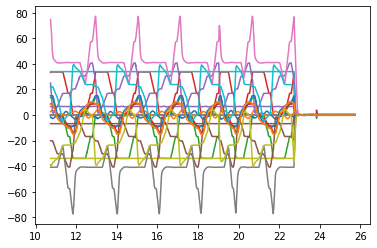

next motion -  Forward


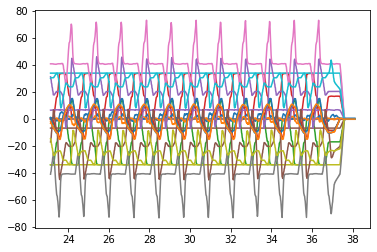

Current motion -  Left


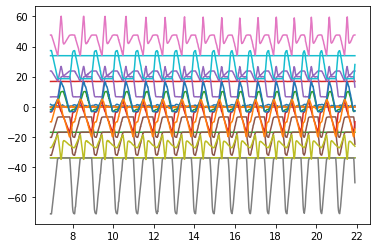

next motion -  left


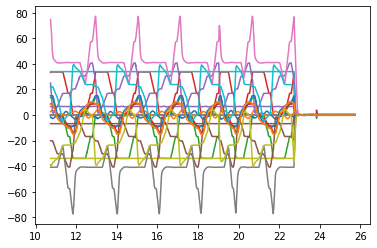

Current motion -  Right


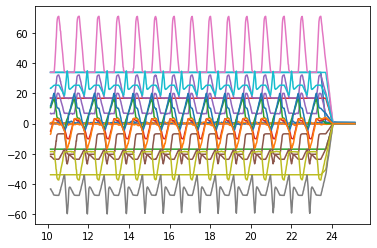

next motion -  Forward


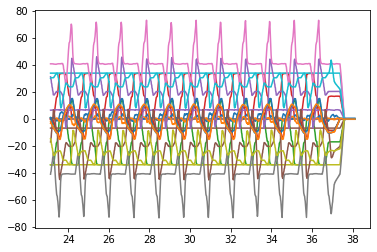

Current motion -  Right


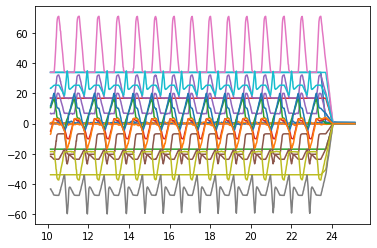

next motion -  Back


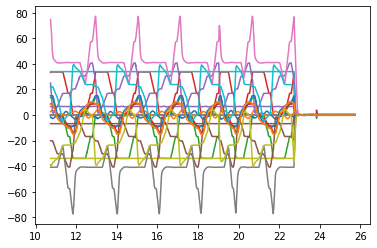

Current motion -  Right


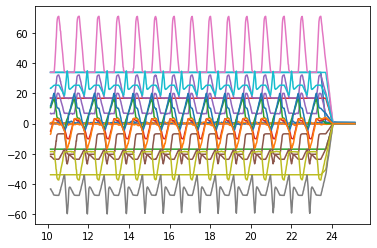

next motion -  Back


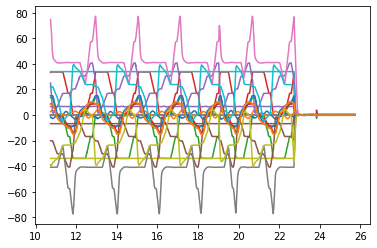

Current motion -  Left


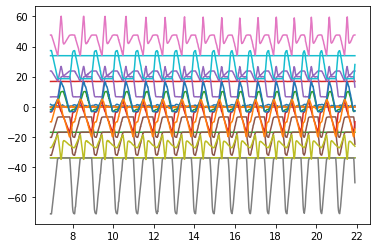

next motion -  left


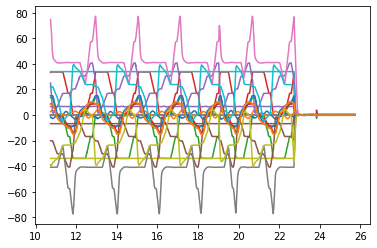

Current motion -  Left


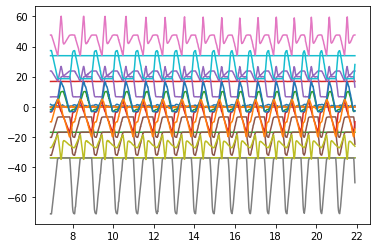

next motion -  right


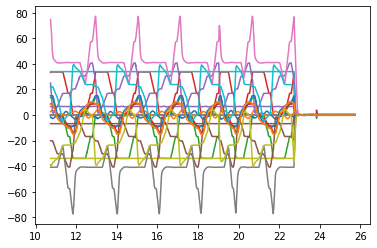

Current motion -  Back


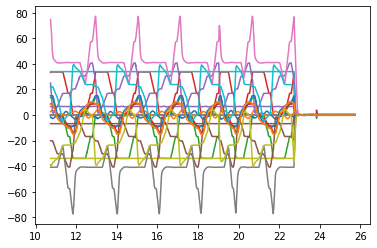

next motion -  Forward


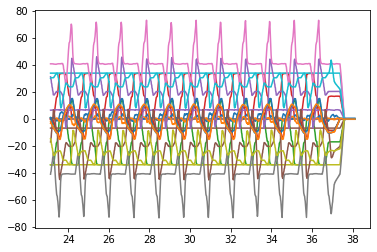

Current motion -  Right


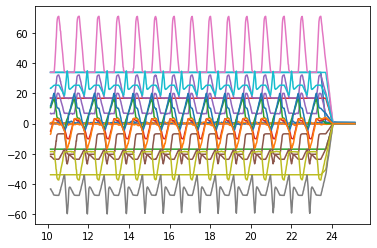

next motion -  Forward


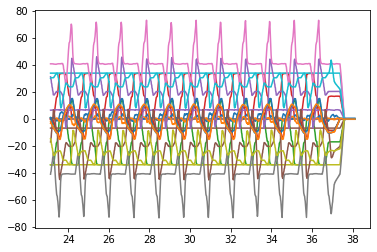

Current motion -  Left


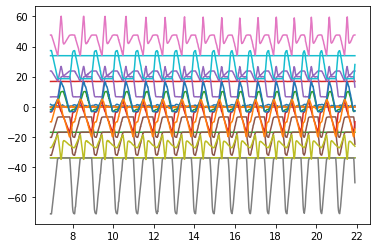

next motion -  Forward


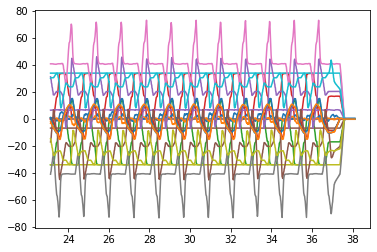

In [31]:
fd = pd.read_csv("forward.csv")
rd = pd.read_csv("right.csv")
ld = pd.read_csv("left.csv")
bd = pd.read_csv("back.csv")

Data_fd = {}
Data_rd = {}
Data_ld = {}
Data_bd = {}

for i in range(1,23):
    Data_fd['Data'+str(i)] = fd['Data'+str(i)]
    Data_rd['Data'+str(i)] = rd['Data'+str(i)]
    Data_ld['Data'+str(i)] = ld['Data'+str(i)]
    Data_bd['Data'+str(i)] = bd['Data'+str(i)]

time_fd = fd['Time (Seconds)']
time_rd = rd['Time (Seconds)']
time_ld = ld['Time (Seconds)']
time_bd = bd['Time (Seconds)']

for i in range(10):
    
    plt.figure()
    if current_motion[i] == 'Forward':
        for j in range(1,23):
            plt.plot(time_fd,Data_fd['Data'+str(j)])
    elif current_motion[i] == 'Right':
        for j in range(1,23):
            plt.plot(time_rd,Data_rd['Data'+str(j)])
    elif current_motion[i] == 'Left':
        for j in range(1,23):
            plt.plot(time_ld,Data_ld['Data'+str(j)])
    else:
        for j in range(1,23):
            plt.plot(time_bd,Data_bd['Data'+str(j)])
    print('Current motion - ',current_motion[i])
    plt.show()
    
    
    plt.figure()
    if next_motion[i] == 'Forward':
        for j in range(1,23):
            plt.plot(time_fd,Data_fd['Data'+str(j)])
    elif next_motion[i] == 'Right':
        for j in range(1,23):
            plt.plot(time_rd,Data_rd['Data'+str(j)])
    elif next_motion[i] == 'Left':
        for j in range(1,23):
            plt.plot(time_ld,Data_ld['Data'+str(j)])
    else:
        for j in range(1,23):
            plt.plot(time_bd,Data_bd['Data'+str(j)])
    print('next motion - ',next_motion[i])
    plt.show()
        

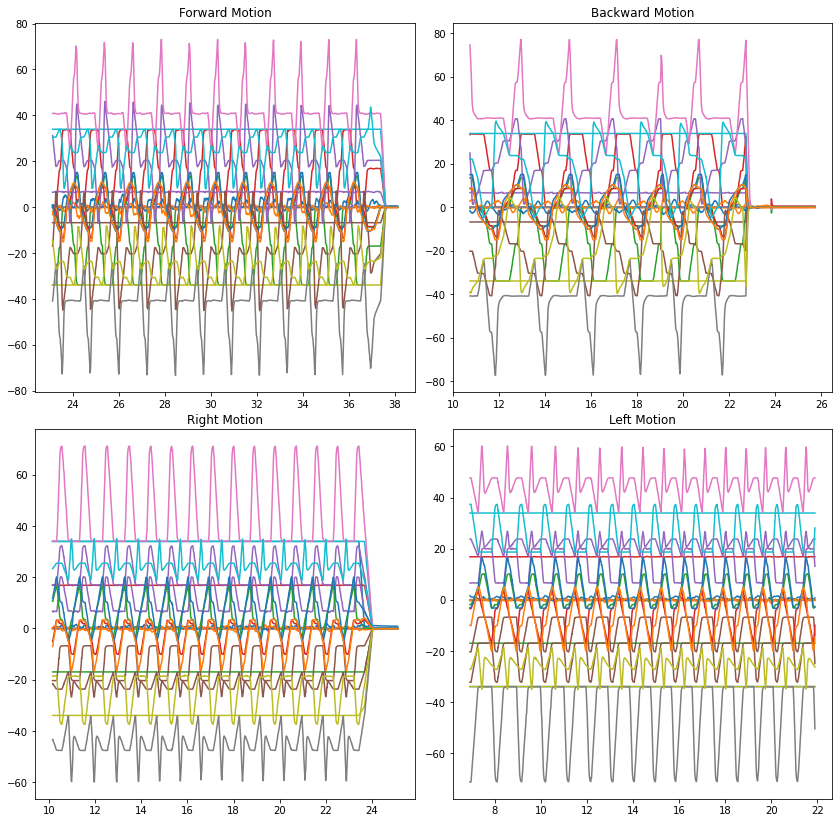

In [32]:
fig = plt.figure()

fig.set_figwidth(14.28)
fig.set_figheight(14.28)

# define subplots and their positions in figure
plt1 = fig.add_subplot(221)
plt2 = fig.add_subplot(222)
plt3 = fig.add_subplot(223)
plt4 = fig.add_subplot(224)
  
# plotting points on each subplot
#x, y = create_plot('Forward Motion')
for j in range(1,23):
    plt1.plot(time_fd,Data_fd['Data'+str(j)])
plt1.set_title('Forward Motion')
  
#x, y = create_plot('Backward Motion')
for j in range(1,23):
    plt2.plot(time_bd,Data_bd['Data'+str(j)])
plt2.set_title('Backward Motion')
  
#x, y = create_plot('Right Motion')
for j in range(1,23):
    plt3.plot(time_rd,Data_rd['Data'+str(j)])
plt3.set_title('Right Motion')
  
#x, y = create_plot('Left Motion')
for j in range(1,23):
    plt4.plot(time_ld,Data_ld['Data'+str(j)])
plt4.set_title('Left Motion')
  
# adjusting space between subplots
fig.subplots_adjust(hspace=0.1,wspace=0.1)
  
# function to show the plot
plt.show()

In [33]:
max_Data = []
min_Data = []

for i in range(1,23):
    max_Data.append(Data['Data'+str(i)].max())
    min_Data.append(Data['Data'+str(i)].min())

In [34]:
max_Data = np.array(max_Data)
max_Data.min()

-0.044096

In [35]:
min_Data = np.array(min_Data)
min_Data.max()

-0.062346